**Entropy of Laser with Fixed Average Photon Numbers**

- author: Longfei Fan
- date: 05/05/2017

**Abstract**

In this note, I study how the entropy of laser changes with respect to time given on differnet A/C values and fixed avergage photon numbers.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from scipy.stats import poisson

from qutip import *
import laser, entropy_utils

%matplotlib inline
%reload_ext autoreload
%autoreload 1
%aimport laser, entropy_utils

In [2]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'png')

# Theoretical Analysis


**Equation of Motion for the Density Matrix of the Cavity Field**

For the density of the cavity field $\rho_{nm}$, we have differential equations given by

$$
\begin{aligned}
\dot{\rho}_{nm} =
&- \frac{M_{nm}A}{1 + N_{nm}B/A} \rho_{nm} + \frac{\sqrt{nm}A}{1 + N_{n-1,m-1}B/A} \rho_{n-1,m-1} \\
&- \frac{C}{2}(n+m)\rho_{nm} + C\sqrt{(n+1)(m+1)} \rho_{n+1, m+1}
\end{aligned}
$$

where
$$
\begin{aligned}
A &= \frac{2r_a g^2}{\gamma^2},\\
B &= \frac{4g^2}{\gamma^2} A,\\
M_{nm} &= \frac{1}{2}(n+m+2) + (n-m)^2\frac{B}{8A},\\
N_{nm} &= \frac{1}{2}(n+m+2) + (n-m)^2\frac{B}{16A}.
\end{aligned}
$$

**Equations for diagonal terms**

It's seen that only diagonal terms are coupled together. Therefore we would have several groups of equations which are decoupled from each other. In particular, for the main diagonal elements, the group of euqations we have are given by

$$
\begin{aligned}
\dot{p}(n) =
&- \frac{(n+1)A}{1 + (n+1)B/A} p(n) + \frac{nA}{1 + nB/A} p(n-1) \\
&- Cnp(n) + C(n+1)p(n+1)
\end{aligned}
$$

If the cavity state starts from a vaccum state, only $\rho_{00}~(p_0)$ is non-zero at the very beginning. Only main diagonal terms are coupled with $\rho_{00}$, so only main diagonal terms will become non-zero during evolution. Other offset diagonal terms will keep zero during the evolution. So we can get the whole density matrix by just solving the main diagonal terms.

# Numeric Simulation

**Paramters**

The average photon number for laser operated above the threshold is given by

$$
\bar{n} = \frac{A}{C} \frac{A - C}{B} = \frac{A}{C} \frac{A - C}{4g^2A/\gamma^2} = (\alpha - 1) \frac{\gamma^2}{4 g^2}
$$

The ratio is given by

$$
\alpha = \frac{A}{C} = \frac{r_a}{2C} \frac{4g^2}{\gamma^2}
$$

Recall that the effective pumping rate is defined by

$$
r_a = \frac{\gamma \lambda}{\gamma + \lambda} = \frac{\gamma}{1 + \lambda / \gamma}
$$

As both $\gamma$ and $\lambda$ are positve but smaller than one, $r_a$ also falls within $0$ and $1$.

**Parameters Used for the Atom and Cavity**

There are a few parameters to be considered for this problem, we have to make something fixed. Here I make the average photon numbers $\bar{n} = 50$ and $\bar{n} = 200$, and the cavity damping rate $C = 0.0001$. Then I can study how entropy evoloves given the fixed steady average photon numbers with respect to differnet A/C ratios.

As $r_a = 2C \alpha \gamma^2 / 4g^2 = 2C \bar{n} \alpha / (1 - \alpha) < 1$, we have $\alpha > 1 / (1 - 2 C \bar{n})$. Then $2 C \bar{n}$ cannot be too large, if we want to explore $\alpha$ which is close to $1$. For $\bar{n} = 50$, we have $\alpha > 1 + 0.01$.

**Initial States**

- cavity: vaccum state $\lvert 0 \rangle$
- atom: ground state $\lvert g \rangle$

## Average Photon Number $\bar{n} = 200$

In [4]:
G = 0.001
KAPPA = 0.0001
NBAR = 200

N_max = 1000
n_list = np.arange(N_max)
init_psi = fock(N_max, 0) # initial cavity state

The entropy estimated by the paper under the apprximation of large average photon numbers

In [17]:
ENTR_APPROX = 0.5 * np.log(NBAR) + 0.5 * np.log(2 * np.pi)
print('ENTROPY APPROXIMATION: {:.4f}'.format(ENTR_APPROX))

ENTROPY APPROXIMATION: 3.5681


The entropy calculated given on the photon statistics of a **coherent state**

In [19]:
pns_cohe = [poisson.pmf(n, NBAR) for n in n_list]
ENTR_COHE = - sum([pn * np.log(pn) for pn in pns_cohe if pn > 0])
print('ENTROPY COHERENT: {:.4f}'.format(ENTR_COHE))

ENTROPY COHERENT: 4.0677


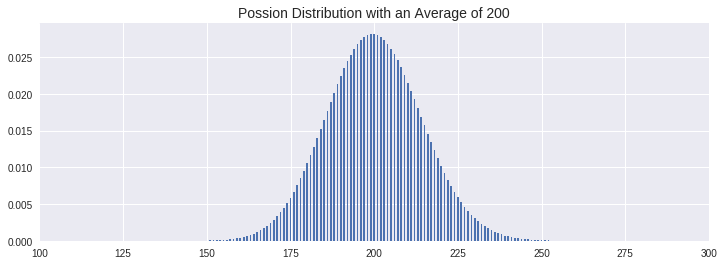

In [38]:
fig, ax = plt.subplots(figsize=(12, 4))
ax.bar(n_list, pns_cohe, width=0.5)
ax.set_xlim(100, 300)
ax.set_title('Possion Distribution with an Average of 200', fontsize=14);

The entropy calculated given on the photon statistics a **thermal state**

In [53]:
ratio = 200.0/201.0
pns_thml = laser.boltzmann(ratio, N_max + 1000)
ENTR_THML = - sum([pn * np.log(pn) for pn in pns_thml if pn > 0])
print('ENTROPY THERMAL: {:.4f}'.format(ENTR_THML))

ENTROPY THERMAL: 6.3001


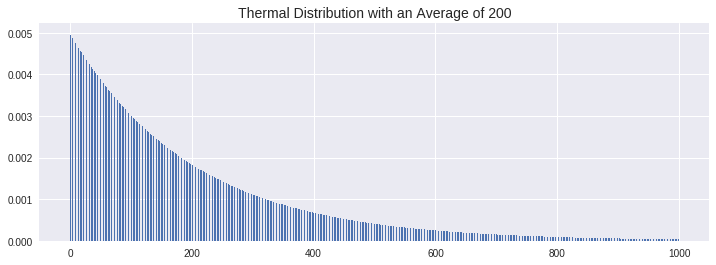

In [55]:
fig, ax = plt.subplots(figsize=(12, 4))
ax.bar(n_list, pns_thml[:N_max], width=0.5)
ax.set_title('Thermal Distribution with an Average of 200', fontsize=14);

### Small A/C Ratios

In [96]:
ratios1 = (1.05, 1.1, 1.2, 1.4)
t_list1 = np.linspace(0, 1200000, 1001)
%time l1, n1, entr1 = entropy_utils.entropy_vs_ratio( \
                        ratios1, t_list1, G, KAPPA, NBAR, N_max, init_psi)

ratio:  1.05, ra: 0.8400, A: 1.050e-04, C: 1.000e-04, B: 2.625e-08

ratio:  1.10, ra: 0.4400, A: 1.100e-04, C: 1.000e-04, B: 5.500e-08

ratio:  1.20, ra: 0.2400, A: 1.200e-04, C: 1.000e-04, B: 1.200e-07

ratio:  1.40, ra: 0.1400, A: 1.400e-04, C: 1.000e-04, B: 2.800e-07

CPU times: user 2min 23s, sys: 320 ms, total: 2min 23s
Wall time: 1min 29s


In [100]:
n1_df = pd.DataFrame(n1, columns=n1.keys() )
entr1_df = pd.DataFrame(entr1, columns=entr1.keys())

n1_df.to_csv('./data/n1_df.csv', index=False)
entr1_df.to_csv('./data/entropy1_df.csv', index=False)

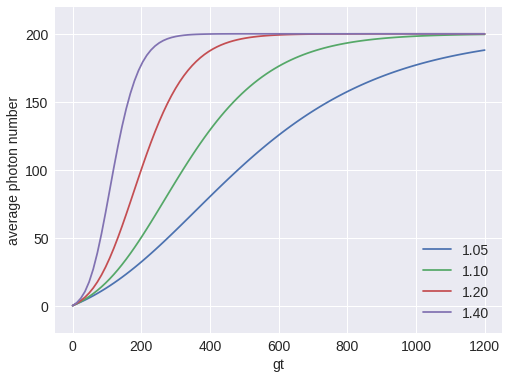

In [3]:
n1_df = pd.read_csv('./data/n1_df.csv')
entropy_utils.df_plot(n1_df, xlim=(-50, 1250), ylim=(-20, 220), \
                      xlabel='gt', ylabel='average photon number')

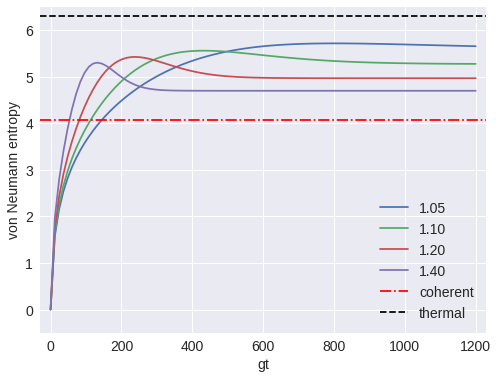

In [56]:
entr1_df = pd.read_csv('./data/entropy1_df.csv')
entropy_utils.df_plot(entr1_df, xlim=(-30, 1230), ylim=(-0.5, 6.5), \
                      xlabel='gt', ylabel='von Neumann entropy', \
                      entr_cohe=ENTR_COHE, entr_thml=ENTR_THML)

### Large Ratios

In [104]:
ratios2 = (1.4, 2, 4, 8)
t_list2 = np.linspace(0, 200000, 1001)
%time l2, n2, entr2 = entropy_utils.entropy_vs_ratio( \
                        ratios2, t_list2, G, KAPPA, NBAR, N_max, init_psi)

ratio:  1.40, ra: 0.1400, A: 1.400e-04, C: 1.000e-04, B: 2.800e-07

ratio:  2.00, ra: 0.0800, A: 2.000e-04, C: 1.000e-04, B: 1.000e-06

ratio:  4.00, ra: 0.0533, A: 4.000e-04, C: 1.000e-04, B: 6.000e-06

ratio:  8.00, ra: 0.0457, A: 8.000e-04, C: 1.000e-04, B: 2.800e-05

CPU times: user 2min 19s, sys: 352 ms, total: 2min 20s
Wall time: 1min 27s


In [105]:
n2_df = pd.DataFrame(n2, columns=n2.keys() )
entr2_df = pd.DataFrame(entr2, columns=entr2.keys())

n2_df.to_csv('./data/n2_df.csv', index=False)
entr2_df.to_csv('./data/entropy2_df.csv', index=False)

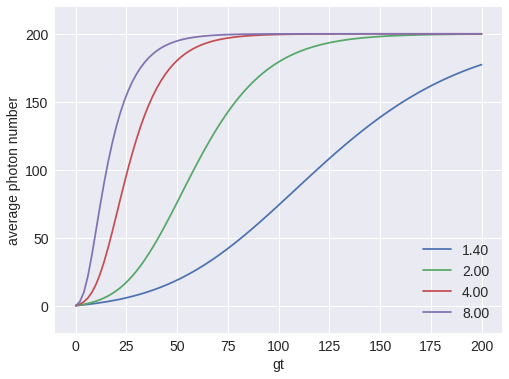

In [60]:
n2_df = pd.read_csv('./data/n2_df.csv')
entropy_utils.df_plot(n2_df, xlim=(-10, 210), ylim=(-20, 220), \
                      xlabel='gt', ylabel='average photon number')

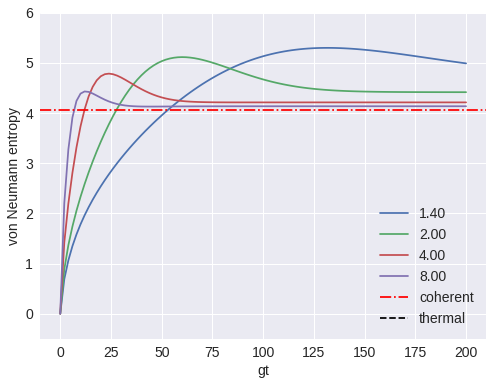

In [62]:
entr2_df = pd.read_csv('./data/entropy2_df.csv')
entropy_utils.df_plot(entr2_df, xlim=(-10, 210), ylim=(-0.5, 6.0), \
                      xlabel='gt', ylabel='von Neumann entropy', \
                      entr_cohe=ENTR_COHE, entr_thml=ENTR_THML)

### Extremely Large Ratios

In [141]:
ratios3 = (8, 32, 128, 1024)
t_list3 = np.linspace(0, 50000, 1001)
%time l3, n3, entr3 = entropy_utils.entropy_vs_ratio( \
                        ratios3, t_list3, G, KAPPA, NBAR, N_max, init_psi)

ratio:  8.00, ra: 0.0457, A: 8.000e-04, C: 1.000e-04, B: 2.800e-05

ratio: 32.00, ra: 0.0413, A: 3.200e-03, C: 1.000e-04, B: 4.960e-04

ratio: 128.00, ra: 0.0403, A: 1.280e-02, C: 1.000e-04, B: 8.128e-03

ratio: 1024.00, ra: 0.0400, A: 1.024e-01, C: 1.000e-04, B: 5.238e-01

CPU times: user 2min, sys: 320 ms, total: 2min
Wall time: 1min 18s


In [142]:
n3_df = pd.DataFrame(n3, columns=n3.keys() )
entr3_df = pd.DataFrame(entr3, columns=entr3.keys())

n3_df.to_csv('./data/n3_df.csv', index=False)
entr3_df.to_csv('./data/entropy3_df.csv', index=False)

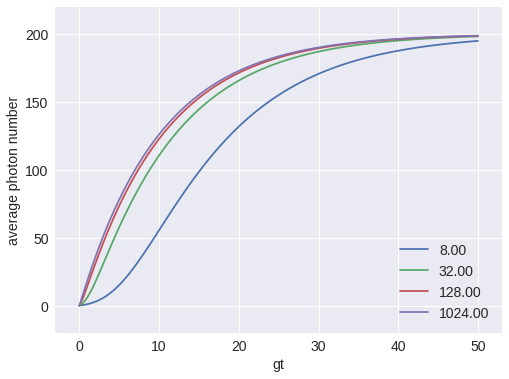

In [63]:
n3_df = pd.read_csv('./data/n3_df.csv')
entropy_utils.df_plot(n3_df, xlim=(-3, 53), ylim=(-20, 220), \
                      xlabel='gt', ylabel='average photon number')

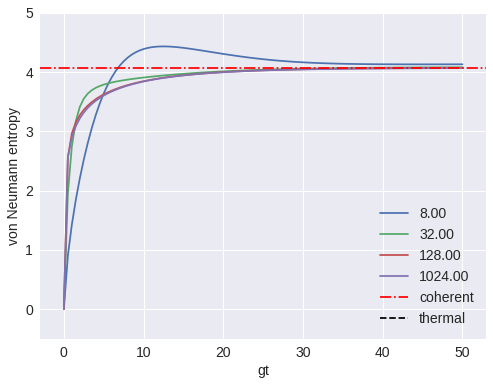

In [65]:
entr3_df = pd.read_csv('./data/entropy3_df.csv')
entropy_utils.df_plot(entr3_df, xlim=(-3, 53), ylim=(-0.5, 5.0), \
                      xlabel='gt', ylabel='von Neumann entropy', \
                      entr_cohe=ENTR_COHE, entr_thml=ENTR_THML)

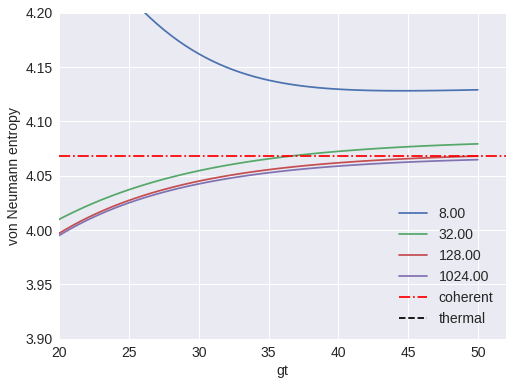

In [66]:
entropy_utils.df_plot(entr3_df, xlim=(20, 52), ylim=(3.9, 4.2), \
                      xlabel='gt', ylabel='von Neumann entropy', \
                      entr_cohe=ENTR_COHE, entr_thml=ENTR_THML)

### Evolution of Photon Statistics for A/C = 4

In [220]:
laser4 = l2['4.00']

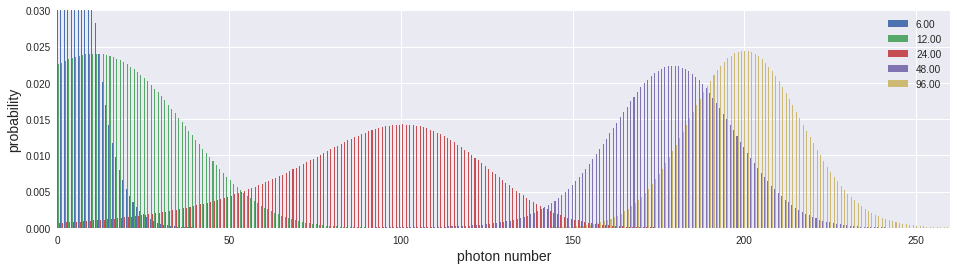

In [215]:
fig, ax = plt.subplots(sharex=True, figsize=(16, 4))
t_list4 = laser4.t_list
pns4 = laser4.get_pns()
gts = (3, 6, 12, 24, 48)
for i in range(len(gts)):
    pns = pns4[gts[i]]
    ax.bar(np.arange(N_max) + 0.3 * i, pns, width=0.3, 
           label='{:4.2f}'.format(t_list4[gts[i]] * G))
ax.set_xlim(0, 260)
ax.set_ylim(0, 0.03)
ax.set_xlabel('photon number', fontsize=14)
ax.set_ylabel('probability', fontsize=14)
ax.legend();

### Evolution of Photon Statistics for A/C = 32

In [221]:
laser32 = l3['32.00']

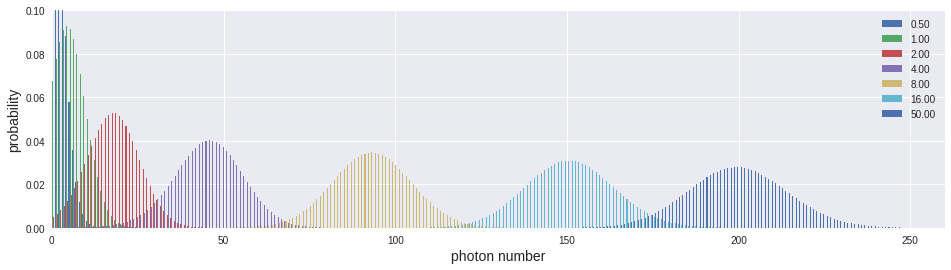

In [228]:
fig, ax = plt.subplots(sharex=True, figsize=(16, 4))
t_list32 = laser32.t_list
pns32 = laser32.get_pns()
gts = (1, 2, 4, 8, 16, 32, 100)
for i in range(len(gts)):
    pns = pns32[gts[i]]
    ax.bar(np.arange(N_max) + 0.3 * i, pns, width=0.3, 
           label='{:4.2f}'.format(t_list32[gts[i]] * G))
ax.set_xlim(0, 260)
ax.set_ylim(0, 0.1)
ax.set_xlabel('photon number', fontsize=14)
ax.set_ylabel('probability', fontsize=14)
ax.legend();